<a href="https://colab.research.google.com/github/madhumitha98/AI_Projects/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import string
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Data Understanding

In [ ]:
data = pd.read_excel("/content/BLOG GENDER BALANCED.xlsx")
data.head()

,BLOG,GENDER
0,Beyond Getting There: What Travel Days Show U...,F
1,I remember so much about the island; the large...,F
2,I have had asthma and allergies my entire life...,M
3,The last few days have been an emotional rolle...,M
4,If you lined up all the teachers and staff in ...,F


In [ ]:
data['BLOG'].dtype

dtype('O')

In [ ]:
data['BLOG'].isnull().sum()

1

# Data preprocessing

In [ ]:
data = data.dropna()

## Remove punctuations

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
data['Tokens'] = data['BLOG'].apply(lambda x:remove_punctuation(x))

In [ ]:
data.head()

,BLOG,GENDER,Tokens
0,Beyond Getting There: What Travel Days Show U...,F,Beyond Getting There What Travel Days Show Us...
1,I remember so much about the island; the large...,F,I remember so much about the island the large ...
2,I have had asthma and allergies my entire life...,M,I have had asthma and allergies my entire life...
3,The last few days have been an emotional rolle...,M,The last few days have been an emotional rolle...
4,If you lined up all the teachers and staff in ...,F,If you lined up all the teachers and staff in ...


## Convert text into lower case

In [ ]:
data['Tokens'] = data['Tokens'].apply(lambda x: x.lower() )

In [ ]:
data.head()

,BLOG,GENDER,Tokens
0,Beyond Getting There: What Travel Days Show U...,F,beyond getting there what travel days show us...
1,I remember so much about the island; the large...,F,i remember so much about the island the large ...
2,I have had asthma and allergies my entire life...,M,i have had asthma and allergies my entire life...
3,The last few days have been an emotional rolle...,M,the last few days have been an emotional rolle...
4,If you lined up all the teachers and staff in ...,F,if you lined up all the teachers and staff in ...


## Apply Word tokenizer and lemmatizer on every word

In [ ]:
def lemma(text):
    l = WordNetLemmatizer()
    res = []
    words = nltk.word_tokenize(text)
    for word in words:
        res.append(l.lemmatize(word))
    return ' '.join(res)

In [ ]:
data['Tokens']= data['Tokens'].apply(lambda x : lemma(x))

## Remove stop words from text

In [ ]:
def stop_rev(text):
    result = []
    token = word_tokenize(text.lower())
    stop = set(stopwords.words('english'))
    for num in token:
        if num not in stop and len(num) >= 3:
            result.append(num)
    return " ".join(result)

In [ ]:
data['Tokens'] = data['Tokens'].apply(lambda x : stop_rev(x))

# Visualize the Data

In [ ]:
data['clean'] = data['Tokens'].apply(lambda x: str(x).split())

## Word cloud visualize

In [ ]:
from collections import Counter
val = Counter([ word  for sentence in data['clean'] for word in sentence])
res = pd.DataFrame(val.most_common(20))
res.columns = ["Words","Word_count"]
res

,Words,Word_count
0,one,4206
1,like,3539
2,time,3358
3,get,2621
4,day,2295
5,would,2294
6,know,2204
7,year,2185
8,thing,2120
9,people,2009


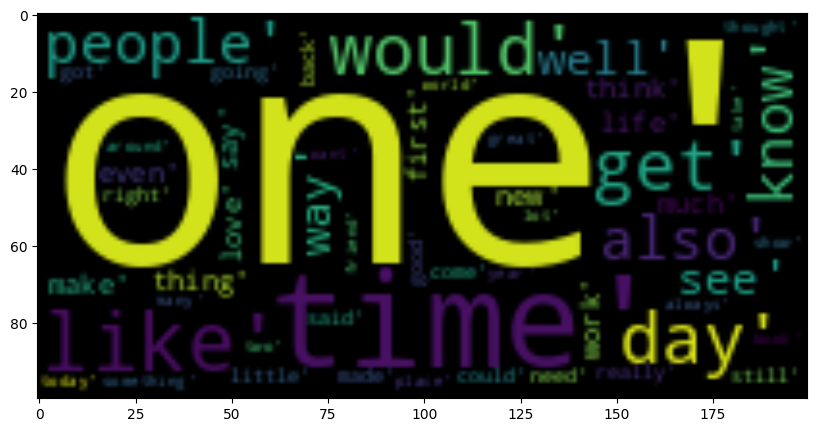

In [ ]:
from wordcloud import WordCloud
clean_words = [str(word) for word in data['clean']]
words = ' '.join(clean_words)
wordcloud = WordCloud(width = 200, height = 100, random_state= 25, max_font_size= 125).generate(words)
plt.figure(figsize=(20,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

## Convert Gender into numeric form

In [ ]:
data['GENDER'] = data['GENDER'].replace({"F": 0, "M":1})
data['GENDER']

0       0
1       0
2       1
3       1
4       0
       ..
2595    0
2596    1
2597    1
2598    1
2599    1
Name: GENDER, Length: 2599, dtype: int64

<Axes: ylabel='GENDER'>

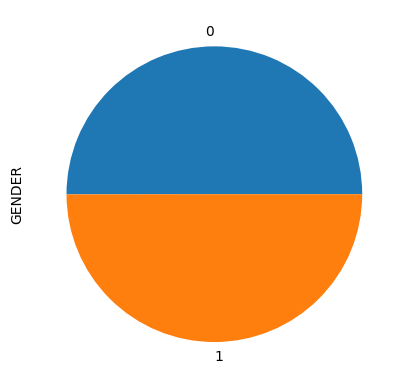

In [ ]:
data['GENDER'].value_counts().plot.pie()

# Vectorization technique (TFIDF)

In [ ]:
x = data['Tokens']
y = data['GENDER']
tfidf = TfidfVectorizer()
res = tfidf.fit_transform(x)
res.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
res.shape

(2599, 53178)

# Models

In [ ]:
model = {"Logistic Regression" : LogisticRegression(), "SVM": SVC(), "NaiveBayers": MultinomialNB(), "DecisionTree": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier()}

In [ ]:
model.items()

dict_items([('Logistic Regression', LogisticRegression()), ('SVM', SVC()), ('NaiveBayers', MultinomialNB()), ('DecisionTree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier())])

In [ ]:
def model_building(model, x,y):
    acc_scores = []
    for k in range(100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        acc_scores.append(acc)
    avg = np.mean(acc_scores)
    return avg

# Accuracy of the Models

In [ ]:
from numpy import mean, std
result, names = list(), list()
for name, model in model.items():
    scores_reg = model_building(model, res, y)
    result.append(scores_reg)
    names.append(name)
    print('>%s %.3f' % (name, mean(scores_reg)))

>Logistic Regression 0.703
>SVM 0.707
>NaiveBayers 0.690
>DecisionTree 0.580
>Random Forest 0.674
